# Обязательная часть
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).
Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком).
Если идей нет, можете взять один из перечисленных ниже:

данные приложений из Google Play;
данные о видео из трендов YouTube;
данные об уровне счастья в разных странах.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from pylab import rcParams
rcParams['figure.figsize'] = 13,6


In [ ]:
df = pd.read_csv('2019.csv')


df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


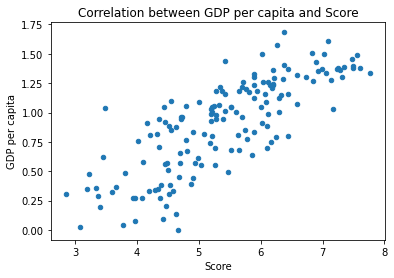

In [ ]:
df.plot(kind='scatter', 
        x='Score', 
        y='GDP per capita', 
        title='Correlation between GDP per capita and Score')


**Гипотеза: Есть прямая связь между счастьем и ВВП на душу населения**

Text(0.5, 1.0, 'Score distribution')

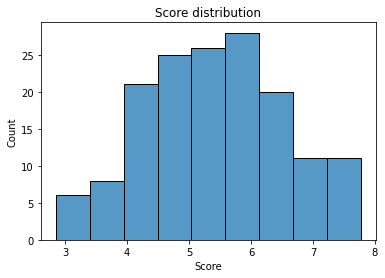

In [ ]:
ax = sns.histplot(df.Score)
ax.set_title('Score distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


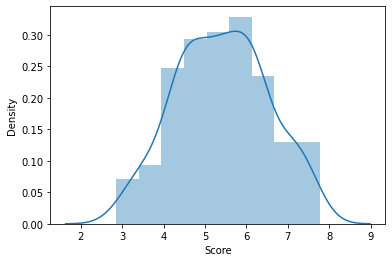

In [ ]:
sns.distplot(df.Score)

**Гипотеза: Большинство стран  счастливо. Распределение близко к нормальному, а значит  "счастье" естественный процесс))))**

Text(0.5, 1.0, 'Correlation between Rank and Generosity')

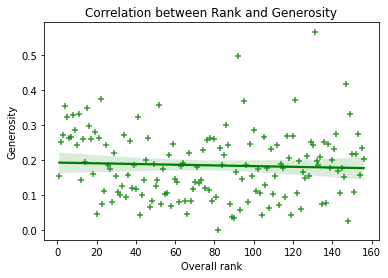

In [ ]:
ax = sns.regplot(data=df, x='Overall rank', y='Generosity', color='green', marker='+')
ax.set_title('Correlation between Rank and Generosity')

**Гипотеза: нет связи "счастья" и "великодущие"**

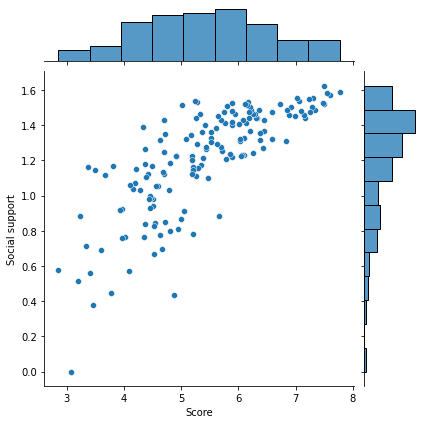

In [ ]:
sns.jointplot(x='Score', y='Social support', 
              data=df, kind='scatter')

**Гипотеза: социальная поддержка может влиять на уровень "счастья" **

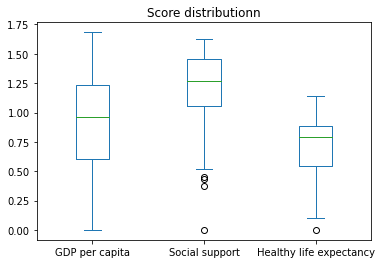

In [ ]:
df[['GDP per capita',	'Social support',	'Healthy life expectancy']].plot(kind='box', title='Score distributionn')

**Выбросы в Social support	при равномерном распределении в GDP per capita показывает, что именно соцстрахование будет драйвером разрушения стран в кризисной ситуации**